In [4]:
import os
#import warnings
#warnings.simplefilter('ignore')
from operator import attrgetter
import scipy as sp
import scipy.ndimage
import numpy as np
import pandas as pd
import skimage
import skimage.measure
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import h5py
from tqdm import tqdm_notebook
from IPython.display import display
import skimage.io
import scipy.misc


In [5]:
h5f = h5py.File("hdf_files/RIM_ONE_v3.hdf5", "r")

In [6]:
X = h5f['RIM-ONE v3/128 px/images']
Y = h5f['RIM-ONE v3/128 px/disc']

In [7]:
print(X.shape, Y.shape)

(159, 128, 128, 3) (159, 128, 128, 1)


In [8]:
# picName = 'dataset/db/' + str(itr)+'.jpg'
# itr = itr + 1
from PIL import Image

for i in range(159):
    im = Image.fromarray(X[i,:,:,:])
    picName = 'dataset/crop/DRISHTI_GS/discs/' + str(i)+'.jpg'
    im.save(picName)
#     picName = 'dataset/db/disc' + str(i)+'.png'
#     scipy.misc.imsave(picName, Y[i,:,:,:])
#     cv2.imwrite(picName, X[i,:,:,:])

In [9]:
# picName = 'dataset/db/' + str(itr)+'.jpg'
# itr = itr + 1
from PIL import Image

for i in range(159):
    im = Image.fromarray(Y[i,:,:,0])
    picName = 'dataset/crop/DRISHTI_GS/discs/' + str(i)+'.png'
    im.save(picName)
#     picName = 'dataset/db/disc' + str(i)+'.png'
#     scipy.misc.imsave(picName, Y[i,:,:,:])
#     cv2.imwrite(picName, X[i,:,:,:])

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

(2040, 2040)
203
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


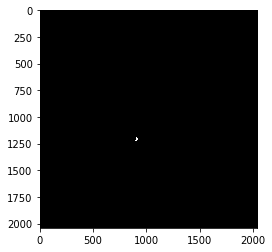

In [10]:


# finalglucoma_classificationTraining400Glaucoma
img = cv2.imread('dataset/DRISHTI_GS/images/1.jpg',0)
plt.imshow(img, cmap='gray')
# cv2.imshow('image',img)
print(img.shape)
print(img.max())
M = img.max()
plt.imshow(img, cmap='gray')
plt.imshow(img>=M-10,cmap='gray')
print(img>120)



206


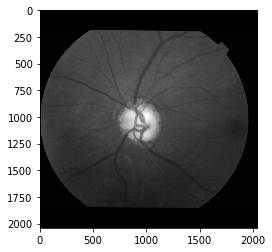

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
993
993


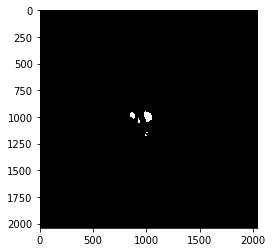

In [26]:
img = cv2.imread('dataset/DRISHTI_GS/images/3.jpg',0)
plt.imshow(img, cmap='gray')
# cv2.imshow('image',img)
m,n = img.shape
print(img.max())
M = img.max()
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(img>=M-30,cmap='gray')
print(img>120)
count=0
x=0;
y=0;
for i in range(400,m-400):
    for j in range(400,n-400):
        if img[i,j]>=M-5:
            x+=i
            y+=j
            count = count+1

xc = int(x/count)
yc = int(y/count)
print(xc)
print(yc)

(2040, 2040, 3)


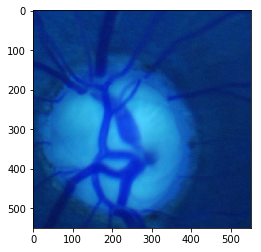

In [27]:
img2 = cv2.imread('dataset/DRISHTI_GS/images/3.jpg',1)
print(img2.shape)

if yc-275<0:
    img_crop= img2[xc-275:xc+275,yc:275,:]
else:
    img_crop= img2[xc-275:xc+275,yc-275:yc+275,:]
plt.imshow(img_crop)
plt.show()
# print(img_crop)

In [37]:
import glob
from skimage.transform import rescale, resize
filelist = glob.glob('dataset/DRISHTI_GS/images/*.jpg')
itr=0
for fname in filelist:
    img = cv2.imread(fname,0)
#     plt.imshow(img, cmap='gray')
    # cv2.imshow('image',img)
    m,n = img.shape
#     print(img.max())
    M = img.max()
#     plt.imshow(img, cmap='gray')
#     plt.show()
#     plt.imshow(img>=M-30,cmap='gray')
#     print(img>120)
    count=0
    x=0;
    y=0;
    for i in range(400,m-400):
        for j in range(400,n-400):
            if img[i,j]>=M-45:
                x+=i
                y+=j
                count = count+1

    xc = int(x/count)
    yc = int(y/count)
    print(yc,xc)
#     print(yc)
    img2 = cv2.imread(fname,1)
#     print(img2.shape)
    print(fname[24:])
    dname = 'dataset/DRISHTI_GS/disc'+fname[24:-4]+'.png'
    img3 = cv2.imread(dname,0)
    print(dname)
    if yc-275<0:
        img_crop= img2[xc-275:xc+275,yc:275,:]
        img_crop2= img3[xc-275:xc+275,yc:275]
    else:
        img_crop= img2[xc-275:xc+275,yc-275:yc+275,:]
        img_crop2= img3[xc-275:xc+275,yc-275:yc+275]

      
    resized_image = cv2.resize(img_crop, (128, 128))
    resized_image2 = cv2.resize(img_crop2, (128, 128)) 
    #     plt.imshow(img_crop)
#     plt.show()
    # print(img_crop)
    picName = 'dataset/crop/DRISHTI_GS/images/' + str(itr)+'.jpg'
    picName2 = 'dataset/crop/DRISHTI_GS/discs/' + str(itr)+'.png'
    itr = itr + 1
    cv2.imwrite(picName, resized_image)
    cv2.imwrite(picName2, resized_image2)

1037 1179
s/4.jpg
dataset/DRISHTI_GS/discs/4.png
1031 1127
s/49.jpg
dataset/DRISHTI_GS/discs/49.png
1134 1107
s/2.jpg
dataset/DRISHTI_GS/discs/2.png
924 1064
s/39.jpg
dataset/DRISHTI_GS/discs/39.png
955 1225
s/46.jpg
dataset/DRISHTI_GS/discs/46.png
1045 1115
s/17.jpg
dataset/DRISHTI_GS/discs/17.png
1017 1169
s/47.jpg
dataset/DRISHTI_GS/discs/47.png
955 1061
s/13.jpg
dataset/DRISHTI_GS/discs/13.png
984 1106
s/45.jpg
dataset/DRISHTI_GS/discs/45.png
1013 1130
s/6.jpg
dataset/DRISHTI_GS/discs/6.png
902 1088
s/21.jpg
dataset/DRISHTI_GS/discs/21.png
1137 1129
s/38.jpg
dataset/DRISHTI_GS/discs/38.png
842 956
s/11.jpg
dataset/DRISHTI_GS/discs/11.png
1109 939
s/27.jpg
dataset/DRISHTI_GS/discs/27.png
995 928
s/32.jpg
dataset/DRISHTI_GS/discs/32.png
925 1079
s/22.jpg
dataset/DRISHTI_GS/discs/22.png
943 1166
s/43.jpg
dataset/DRISHTI_GS/discs/43.png
958 1150
s/41.jpg
dataset/DRISHTI_GS/discs/41.png
830 1029
s/30.jpg
dataset/DRISHTI_GS/discs/30.png
988 1047
s/26.jpg
dataset/DRISHTI_GS/discs/26.png
1